In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in test data

In [101]:
train_df = pd.read_csv('data/train.csv')

In [102]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [104]:
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


Merge train df to other data sources

In [105]:
holiday_events_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

In [106]:
# Merge to store info
train_df = train_df.merge(stores_df, left_on = 'store_nbr', right_on='store_nbr', how='left')

In [107]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [108]:
# Set all items in the df to be a holiday
holiday_events_df['holiday_flag'] = 1

In [109]:
print(set(holiday_events_df.locale_name).intersection(set(train_df.state)))
print(set(holiday_events_df.locale_name).intersection(set(train_df.city)))

{'Santa Elena', 'Cotopaxi', 'Esmeraldas', 'Santo Domingo de los Tsachilas', 'Loja', 'Imbabura'}
{'Guaranda', 'Ambato', 'Quito', 'Cayambe', 'Libertad', 'Latacunga', 'Puyo', 'Ibarra', 'Guayaquil', 'Manta', 'Santo Domingo', 'Esmeraldas', 'Riobamba', 'Salinas', 'Machala', 'Quevedo', 'Cuenca', 'El Carmen', 'Loja'}


In [110]:
# Merge to holiday info
train_df = train_df.merge(holiday_events_df[['holiday_flag', 'date', 'locale_name']], left_on = ['date', 'city'], right_on=['date', 'locale_name'], how='left')
train_df = train_df.merge(holiday_events_df[['holiday_flag', 'date', 'locale_name']], left_on = ['date', 'state'], right_on=['date', 'locale_name'], how='left')

In [111]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_flag_x,locale_name_x,holiday_flag_y,locale_name_y
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN


In [113]:
train_df['holiday_flag_y'].notna().sum()

1320

In [114]:
# Merge the 2 columns from the holiday join
for col in train_df.columns:
    if '_x' in col:
        print(f'filling {col} with {col.replace("_x", "_y")}')
        train_df[col.replace('_x', '')] = train_df[col].fillna(train_df[col.replace('_x', '_y')])

filling holiday_flag_x with holiday_flag_y
filling locale_name_x with locale_name_y


In [117]:
# Fill none holiday days
train_df['holiday_flag'] = train_df['holiday_flag'].fillna(0)

In [128]:
# Remove temp columns using in merge
train_df = train_df[[col for col in train_df.columns if '_x' not in col if '_y' not in col]]

In [131]:
train_df.describe()

,id,store_nbr,sales,onpromotion,cluster,holiday_flag
count,3.001152e+06,3.001152e+06,3.001152e+06,3.001152e+06,3.001152e+06,3.001152e+06
mean,1.500515e+06,2.750037e+01,3.577710e+02,2.602886e+00,8.481395e+00,4.508269e-03
std,8.662772e+05,1.558533e+01,1.101973e+03,1.221882e+01,4.649769e+00,6.699213e-02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,7.502878e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
50%,1.500576e+06,2.800000e+01,1.100000e+01,0.000000e+00,8.500000e+00,0.000000e+00
75%,2.250863e+06,4.100000e+01,1.958510e+02,0.000000e+00,1.300000e+01,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.000000e+00


In [135]:
train_df.groupby('date').sum()['sales'].reset_index()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1679,2017-08-11,826373.722022
1680,2017-08-12,792630.535079
1681,2017-08-13,865639.677471
1682,2017-08-14,760922.406081


In [133]:
train_df['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-08-13',
       '2017-08-14', '2017-08-15'], dtype=object)

### Plot timeseries of sales

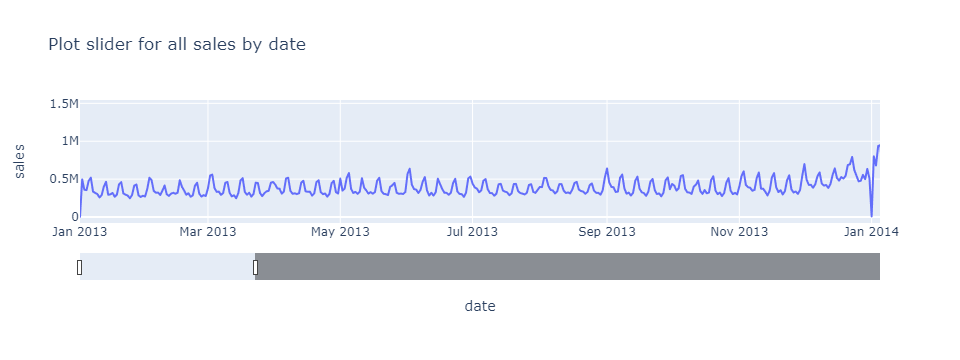

In [136]:
import plotly.express as px

fig = px.line(train_df.groupby('date').sum()['sales'].reset_index(), x = 'date', y ='sales', title='Plot slider for all sales by date')
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.show()

In [150]:
train_df['day_name'] = pd.to_datetime(train_df['date']).dt.day_name()
train_df['day'] = pd.to_datetime(train_df['date']).dt.day
train_df['week'] = pd.to_datetime(train_df['date']).dt.week
train_df['month'] = pd.to_datetime(train_df['date']).dt.month
train_df['year'] = pd.to_datetime(train_df['date']).dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value i

In [153]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_flag,locale_name,day_name,day,week,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,0.0,NaN,Tuesday,1,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001147,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,0.0,NaN,Tuesday,15,33,8,2017
3001148,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,0.0,NaN,Tuesday,15,33,8,2017
3001149,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,0.0,NaN,Tuesday,15,33,8,2017
3001150,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,0.0,NaN,Tuesday,15,33,8,2017


### Train test split

In [154]:
from sklearn.model_selection import train_test_split

In [157]:
train, test = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True, stratify=None)

In [3]:
y_train = train['sales']
X_train = train[[col for col in train_df.columns if col != 'sales']]
y_test = test['sales']
X_test = test[[col for col in train_df.columns if col != 'sales']]

NameError: name 'train' is not defined

In [ ]:
X_train = pd.get_dummies(X_train)

In [2]:
X_test

NameError: name 'X_test' is not defined

# Base Model

In [167]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [166]:
reg = LGBMRegressor()